In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import import_ipynb
import Classes 

importing Jupyter notebook from Classes.ipynb


C:\Users\Asiye\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# CLASSIFICATION

## DECISION TREE

In [3]:
data = pd.read_csv("hmelq.csv")
df = data.copy()

In [4]:
# Preprocess

p = Classes.Preprocess(data)
p.get_missing_values()

------------  Missing Values  -------------


debtinc    767
derog      427
delinq     351
mortdue    314
yoj        312
ninq       303
clage      179
job        167
reason     147
clno       133
value       64
loan         0
bad          0
dtype: int64

In [5]:
p.drop('any')

Drop Öncesi Data Shape -->    (3576, 13)
Drop Sonrası Data Shape -->    (2018, 13)
------------  Missing Values  -------------


debtinc    0
clno       0
ninq       0
clage      0
delinq     0
derog      0
yoj        0
job        0
reason     0
value      0
mortdue    0
loan       0
bad        0
dtype: int64

In [6]:
# DUMMIES

HomeImp = pd.get_dummies(data['reason'], drop_first =True)
jobs = pd.get_dummies(data['job'], drop_first =True)
data=pd.concat([data,HomeImp,jobs],axis=1)
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc,HomeImp,Office,Other,ProfEx,Sales,Self
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056,0,0,0,0,0,0
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079,0,0,0,0,0,0
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459,0,0,0,0,0,0
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108,0,0,0,0,0,0


In [7]:
data.drop(['reason','job'],axis =1,inplace=True)
data.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,HomeImp,Office,Other,ProfEx,Sales,Self
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,0,0,0,0,0,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,0,0,0,0,0,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,0,0,0,0,0,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,0,0,0,0,0,0


In [8]:
X = data.loc[:, data.columns != 'bad']
y = data.loc[:, data.columns == 'bad']


Grid Search Helper



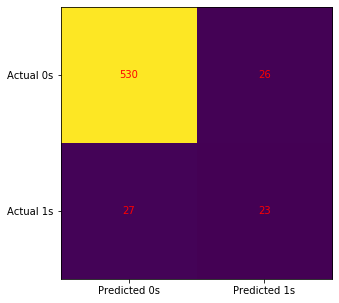

TEST Accuracy  Score :   0.9125412541254125
Classification Report  : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       556
           1       0.47      0.46      0.46        50

    accuracy                           0.91       606
   macro avg       0.71      0.71      0.71       606
weighted avg       0.91      0.91      0.91       606

-------------- DECISION TREE WITH BEST PARAMETERS /GridSearchCV  --------------------

Fitting 10 folds for each of 1824 candidates, totalling 18240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 5606 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 10700 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 15677 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 18233 out of 18240 | elapsed:  3.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 18240 out of 18240 | elapsed:  3.2min finished


En iyi parametreler :  {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2}

TRAIN Accuracy  Score :   0.9624645892351275


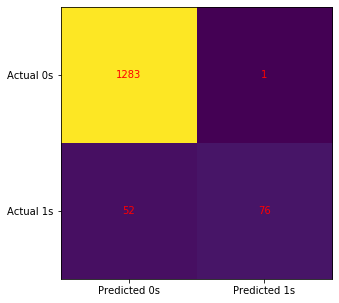

TEST Accuracy  Score :   0.9356435643564357


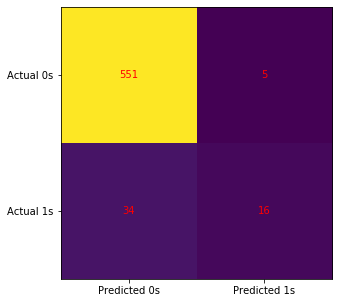

Classification Report  : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       556
           1       0.76      0.32      0.45        50

    accuracy                           0.94       606
   macro avg       0.85      0.66      0.71       606
weighted avg       0.93      0.94      0.92       606


Importances Feature and Graph : 
    feature  importance
9   debtinc       0.444
0      loan       0.104
2     value       0.096
6     clage       0.094
5    delinq       0.092
7      ninq       0.081
1   mortdue       0.030
4     derog       0.030
12    Other       0.021
3       yoj       0.008
8      clno       0.000
10  HomeImp       0.000
11   Office       0.000
13   ProfEx       0.000
14    Sales       0.000
15     Self       0.000



In [9]:
g = Classes.GridSearchHelper()
a,m = g.DecisionTreeCls(X,y)

In [10]:
feature_cols = X.columns

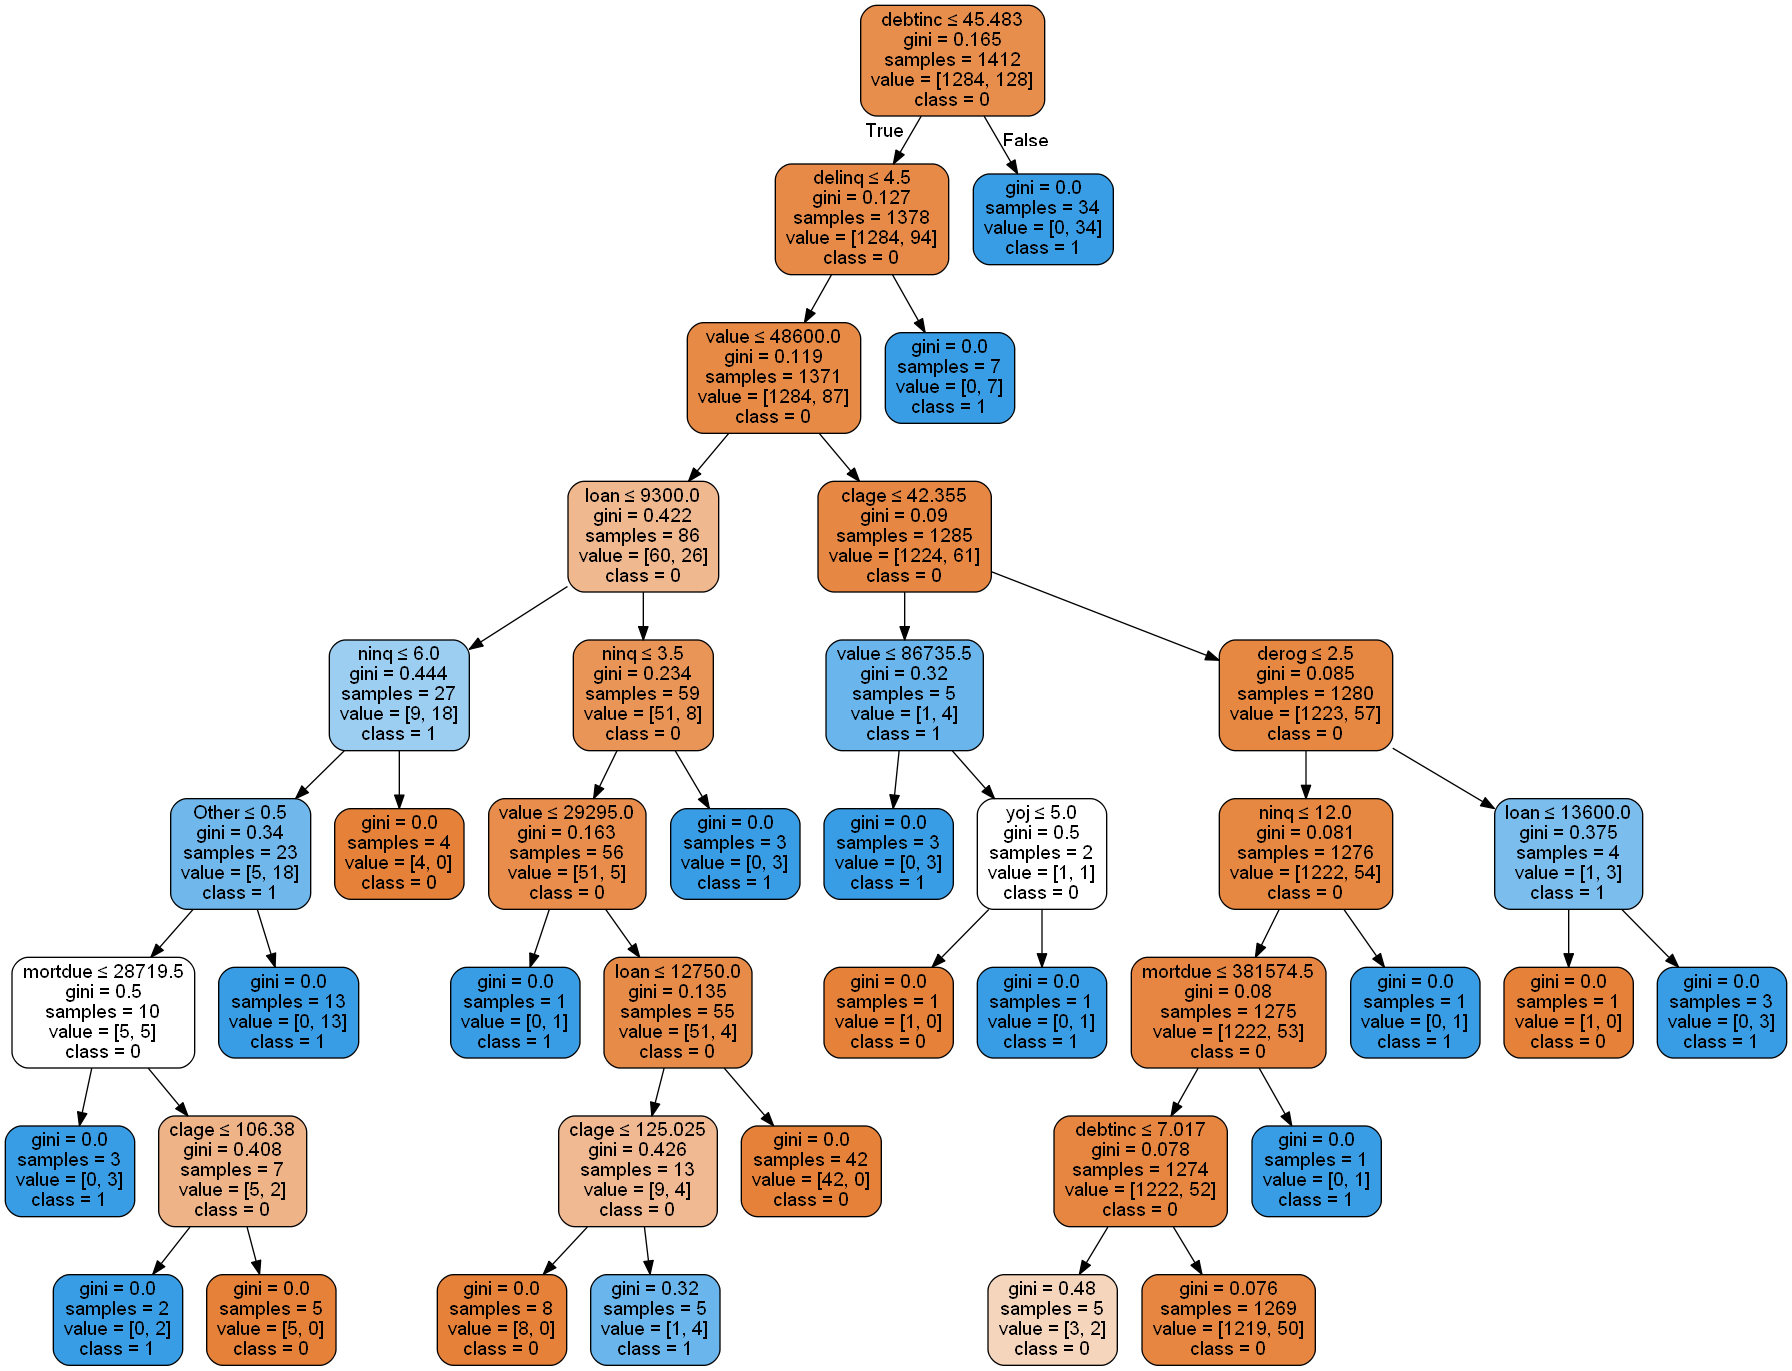

In [11]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(m, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTreeCls.png')
Image(graph.create_png())

## RANDOM FOREST

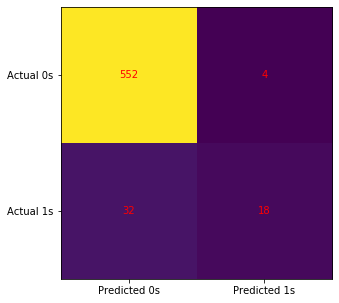

TEST Accuracy  Score :   0.9405940594059405
Classification Report  : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       556
           1       0.82      0.36      0.50        50

    accuracy                           0.94       606
   macro avg       0.88      0.68      0.73       606
weighted avg       0.93      0.94      0.93       606

-------------- RANDOM FOREST WITH BEST PARAMETERS /GridSearchCV  --------------------

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  1.2min finished


En iyi parametreler :  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}

TRAIN Accuracy  Score :   0.9603399433427762


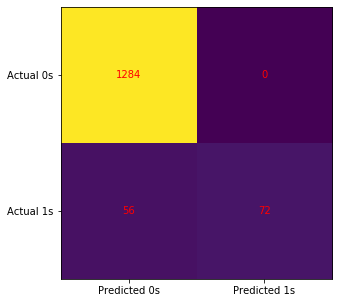

TEST Accuracy  Score :   0.9405940594059405


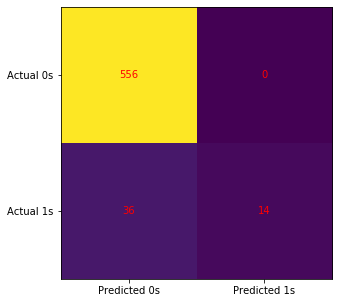

Classification Report  : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       556
           1       1.00      0.28      0.44        50

    accuracy                           0.94       606
   macro avg       0.97      0.64      0.70       606
weighted avg       0.94      0.94      0.92       606


Importances Feature and Graph : 
    feature  importance
9   debtinc       0.413
5    delinq       0.091
2     value       0.088
0      loan       0.082
6     clage       0.081
1   mortdue       0.058
8      clno       0.049
4     derog       0.044
7      ninq       0.038
3       yoj       0.034
11   Office       0.006
10  HomeImp       0.005
12    Other       0.005
13   ProfEx       0.002
14    Sales       0.001
15     Self       0.001



In [12]:
accuracy,random_forest_model = g.RandomForestCls(X,y)

# REGRESSION

## DECISION TREE

In [3]:
dataset = pd.read_excel("HW_Data_Set.xlsx")

In [4]:
dataset = dataset[dataset['ind_420'] != '?']
dataset = dataset[dataset['ind_422'] != '?']

#dummy

RED = pd.get_dummies(dataset['ind_109'], drop_first =True)
dataset=pd.concat([dataset,RED],axis=1)
dataset.drop(['ind_109'],axis =1,inplace=True)

In [5]:
X = dataset.iloc[:, 0:132]
y = dataset.loc[:, dataset.columns == '20_target']

In [6]:
cate =X.select_dtypes(include='object')
cate

,ind_420,ind_422
0,-152,-353
1,-158,-359
2,-160,-362
3,-166,-367
4,-186,-388
...,...,...
6162,-11,-270
6163,-12,-271
6164,-21,-280
6165,-33,-292


In [7]:
X.astype('float64').dtypes

ind_5      float64
ind_6      float64
ind_8      float64
ind_9      float64
ind_10     float64
            ...   
ind_420    float64
ind_422    float64
ind_424    float64
ind_426    float64
ind_428    float64
Length: 132, dtype: object

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape

(3844, 132)

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
reg_model = DecisionTreeRegressor()

In [22]:
reg_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [24]:
y_pred = reg_model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

13.980320214001953

In [26]:
# Model Tuning

reg_dec_model = DecisionTreeRegressor()
reg_dec_model.fit(X_train, y_train)
y_pred = reg_dec_model.predict(X_test)

In [34]:
reg_dec_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [35]:
cart_params = {"min_samples_split" : range(20,50),
              "min_samples_leaf" : range(10,15,20),
              "max_leaf_nodes": range(4,8),"max_depth": range(1,20)}



In [36]:
cart_cv_model = GridSearchCV(reg_dec_model, cart_params, cv = 10,n_jobs =-1, verbose = 2)
cart_cv_model = cart_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 2280 candidates, totalling 22800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

In [37]:
cart_cv_model.best_params_

{'max_depth': 7,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 27}

In [38]:
model  = DecisionTreeRegressor(max_depth = 7,max_leaf_nodes = 7, min_samples_leaf = 10, min_samples_split= 27)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

14.490464186560065

In [40]:
feature_cols = X_train.columns

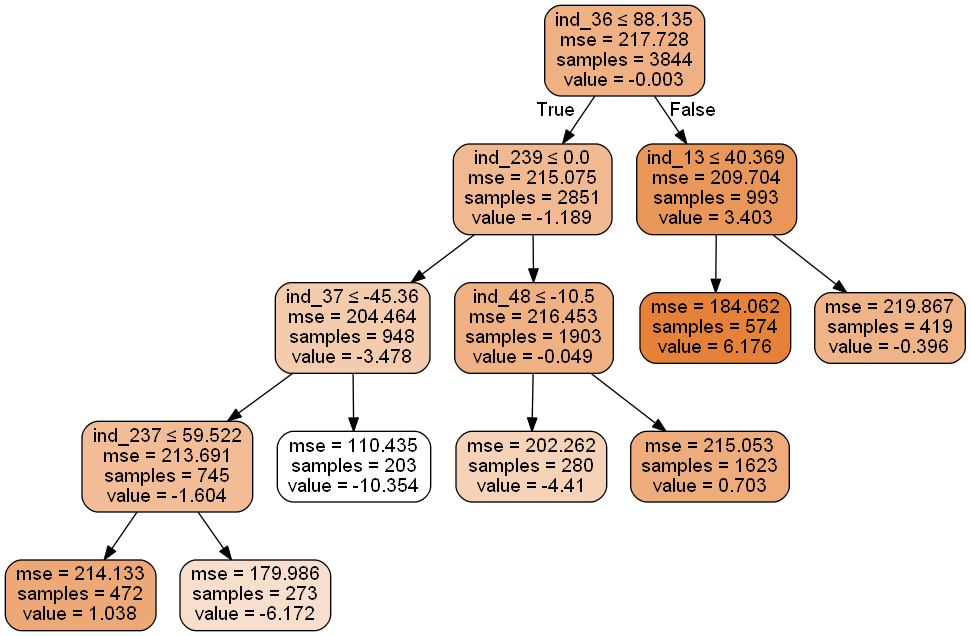

In [41]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTreeReg.png')
Image(graph.create_png())

## Random Forest 

In [9]:
from sklearn.ensemble import RandomForestRegressor 
  

regressor = RandomForestRegressor(n_estimators = 100, random_state = 42) 
regressor.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [10]:
y_pred = regressor.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

10.205892872015024

In [13]:
# Model Tuning

rf_params = {"max_features" : [3,5,10,15],
              "n_estimators" :[100,200,500,1000,2000]}

rf_model = RandomForestRegressor(random_state =42)


In [14]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv =10,n_jobs = -1)

In [15]:
rf_cv_model = rf_cv_model.fit(X_train,y_train)

In [16]:
rf_cv_model.best_params_

{'max_features': 15, 'n_estimators': 2000}

In [17]:
rf_tuned = RandomForestRegressor(max_features =15,n_estimators = 2000, random_state =42)

In [18]:
rf_tuned.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=15, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [19]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

10.205892872015024

In [20]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf_tuned.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
128,ind_422,0.020
127,ind_420,0.020
75,ind_156,0.018
29,ind_37,0.017
96,ind_313,0.017
...,...,...
111,ind_349,0.000
110,ind_347,0.000
109,ind_345,0.000
108,ind_344,0.000
